# Regression with memory usage

## Redis YCSB 12x20min

In [30]:
from helpers import (
    draw_regression_graph,
    fit_regression,
    get_data_with_metrics,
)

experiment_name = 'redis_ycsb_12x20'

exp_name, df = next(get_data_with_metrics(experiment_name, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1591872872,1591872871,0.079693,9487.666034,1572.0,4.553658e+09,1.0
1,1591872933,1591872932,0.078356,10040.160643,1627.0,4.483006e+09,1.0
2,1591872994,1591872992,0.077941,9950.248756,1655.0,4.633547e+09,1.0
3,1591873055,1591873053,0.076327,10080.645161,1704.0,4.555633e+09,1.0
4,1591873111,1591873113,0.082048,9199.632015,1638.0,4.475527e+09,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2932.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          5.47e-134
Time:                        19:08:46   Log-Likelihood:                 874.17
No. Observations:                 235   AIC:                            -1744.
Df Residuals:                     233   BIC:                            -1737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0696      0.001     85.747      

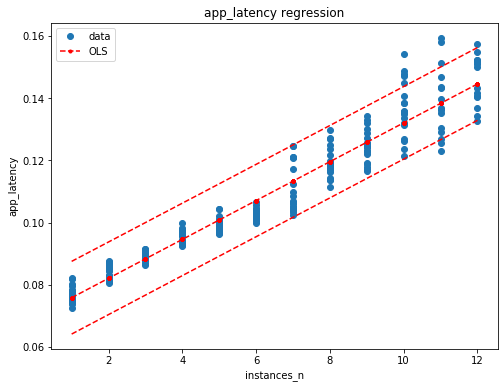

In [31]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1187.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.10e-93
Time:                        19:08:48   Log-Likelihood:                 779.97
No. Observations:                 235   AIC:                            -1556.
Df Residuals:                     233   BIC:                            -1549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0582      0.002     37.186      0.0

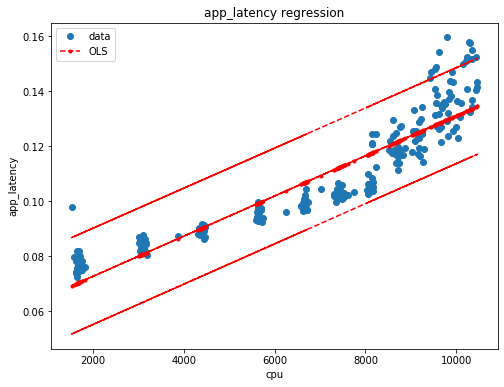

In [32]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `memory`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1579.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          9.24e-106
Time:                        19:08:50   Log-Likelihood:                 808.65
No. Observations:                 235   AIC:                            -1613.
Df Residuals:                     233   BIC:                            -1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1586      0.007    -23.545      0.0

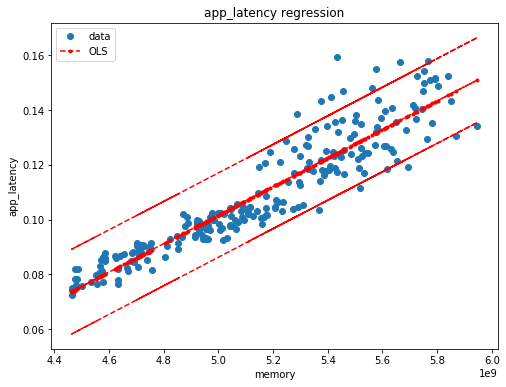

In [33]:
results = fit_regression(data=df, formula='app_latency ~ memory')
draw_regression_graph(results, df, metric_name='app_latency', variable='memory')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [34]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1524.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          3.63e-134
Time:                        19:08:53   Log-Likelihood:                 878.86
No. Observations:                 235   AIC:                            -1752.
Df Residuals:                     232   BIC:                            -1741.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0729      0.001     54.861      

### `app_latency` ~ `instances_n` + `cpu` + `memory`

In [35]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          1.54e-132
Time:                        19:08:55   Log-Likelihood:                 878.90
No. Observations:                 235   AIC:                            -1750.
Df Residuals:                     231   BIC:                            -1736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0677      0.018      3.665      

### Single variable plots

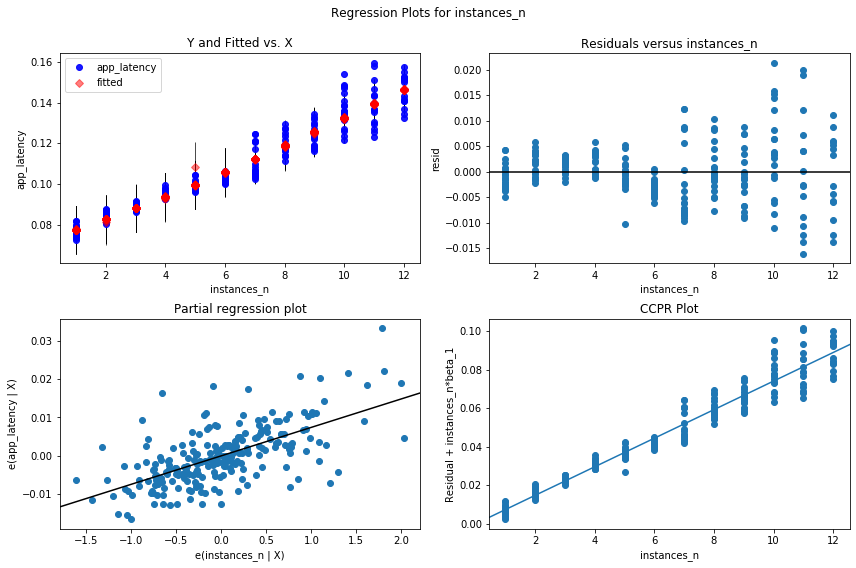

In [37]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

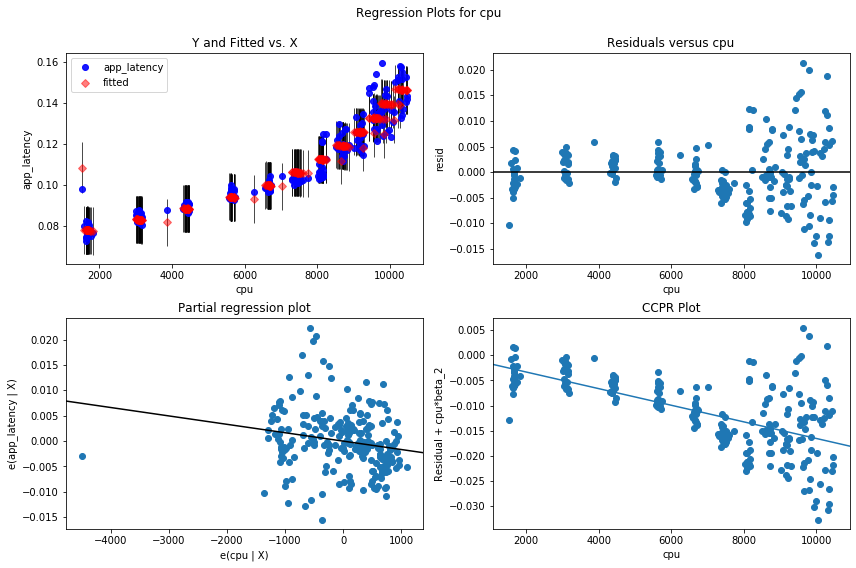

In [38]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

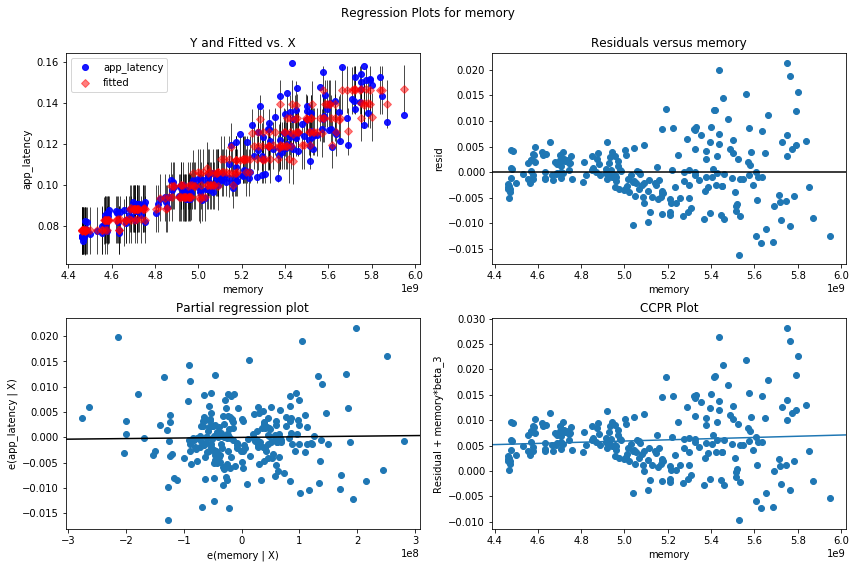

In [39]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "memory", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2882.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          1.53e-133
Time:                        02:55:58   Log-Likelihood:                -1899.4
No. Observations:                 236   AIC:                             3803.
Df Residuals:                     234   BIC:                             3810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1861.3874    104.538     17.806      

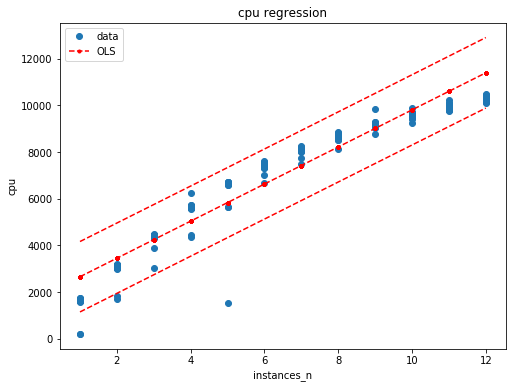

In [22]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

### `memory` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                 memory   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3918.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          1.03e-147
Time:                        17:42:12   Log-Likelihood:                -4642.3
No. Observations:                 235   AIC:                             9289.
Df Residuals:                     233   BIC:                             9296.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.427e+09   1.27e+07    348.283      

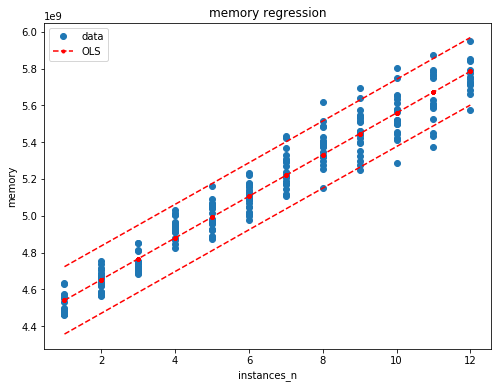

In [5]:
results = fit_regression(data=df, formula='memory ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='memory', variable='instances_n')

### `memory` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:                 memory   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2180.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          2.97e-120
Time:                        17:54:53   Log-Likelihood:                -4706.1
No. Observations:                 235   AIC:                             9416.
Df Residuals:                     233   BIC:                             9423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.193e+09   2.15e+07    194.821      0.0

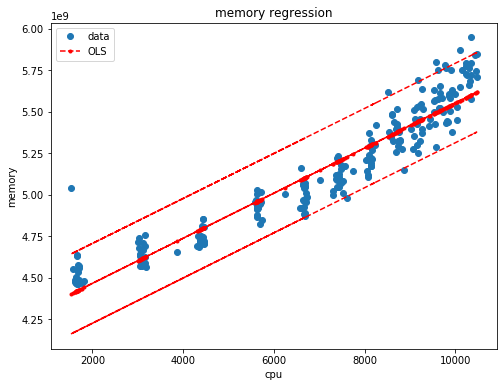

In [20]:
results = fit_regression(data=df, formula='memory ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='memory', variable='cpu')

## Linpack 12x20min

In [40]:
experiment_name = 'linpack_12x20'

exp_name, df = next(get_data_with_metrics(experiment_name, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1592311591,1592311594,NaN,33.3820,2035.0,4.546589e+09,1.0
1,1592311651,1592311654,NaN,33.3700,2034.0,4.547256e+09,1.0
2,1592311711,1592311715,NaN,33.3523,2034.0,4.545925e+09,1.0
3,1592311771,1592311775,NaN,32.2720,2057.0,4.546154e+09,1.0
4,1592311831,1592311836,NaN,33.1085,2044.0,4.545212e+09,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1796.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           5.21e-85
Time:                        17:58:52   Log-Likelihood:                -326.28
No. Observations:                 151   AIC:                             656.6
Df Residuals:                     149   BIC:                             662.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6673      0.328    105.597      

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


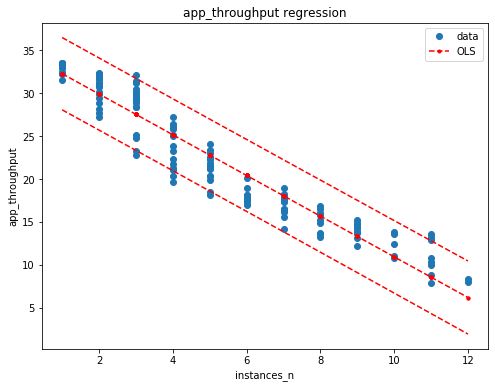

In [22]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1822.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.90e-85
Time:                        18:43:53   Log-Likelihood:                -325.26
No. Observations:                 151   AIC:                             654.5
Df Residuals:                     149   BIC:                             660.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5273      0.406     94.955      0.0

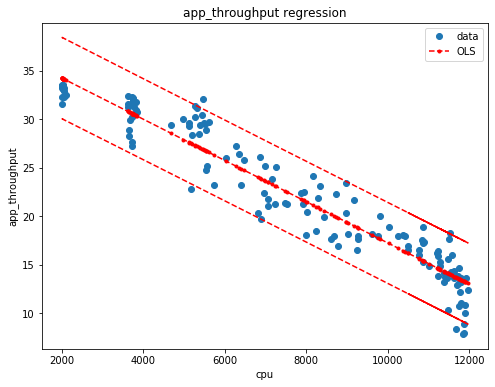

In [26]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')
print(results.summary())

### `app_throughput` ~ `memory`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     817.5
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.27e-62
Time:                        18:44:06   Log-Likelihood:                -379.07
No. Observations:                 151   AIC:                             762.1
Df Residuals:                     149   BIC:                             768.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.0696      1.844     40.716      0.0

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


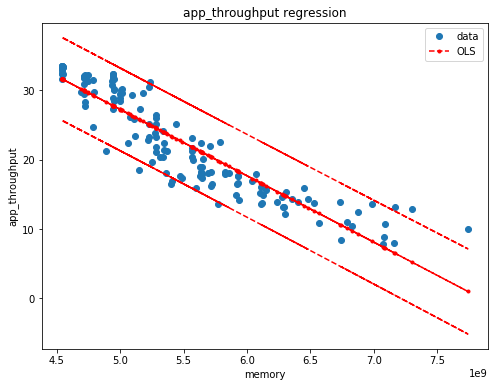

In [27]:
results = fit_regression(data=df, formula='app_throughput ~ memory')
draw_regression_graph(results, df, metric_name='app_throughput', variable='memory')
print(results.summary())

### `app_throughput` ~ `instances_n` + `cpu`

In [24]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1293.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.84e-94
Time:                        17:59:15   Log-Likelihood:                -300.02
No. Observations:                 151   AIC:                             606.0
Df Residuals:                     148   BIC:                             615.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.9478      0.401     92.050      

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


### `app_throughput` ~ `instances_n` + `cpu` + `memory`

In [41]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     858.3
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           6.47e-93
Time:                        19:12:08   Log-Likelihood:                -299.87
No. Observations:                 151   AIC:                             607.7
Df Residuals:                     147   BIC:                             619.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.8270      3.483     11.149      

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Single variable plots

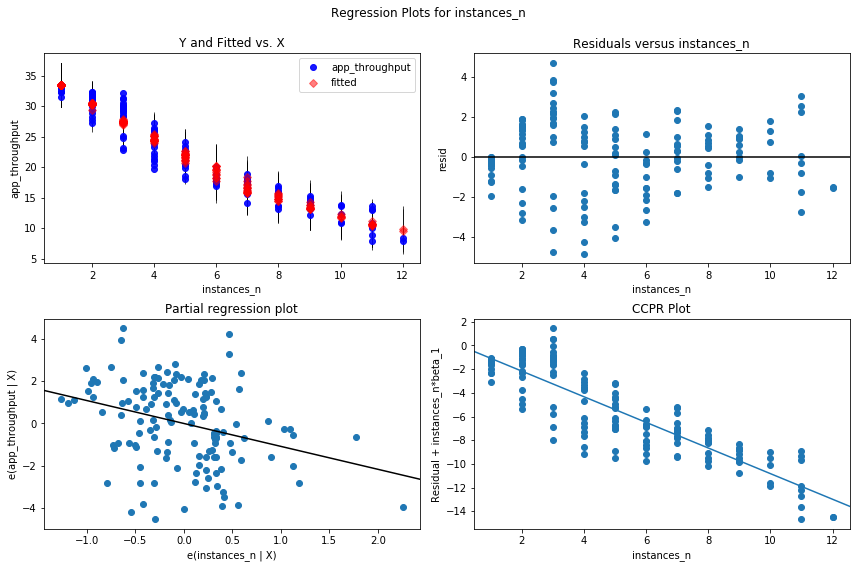

In [42]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

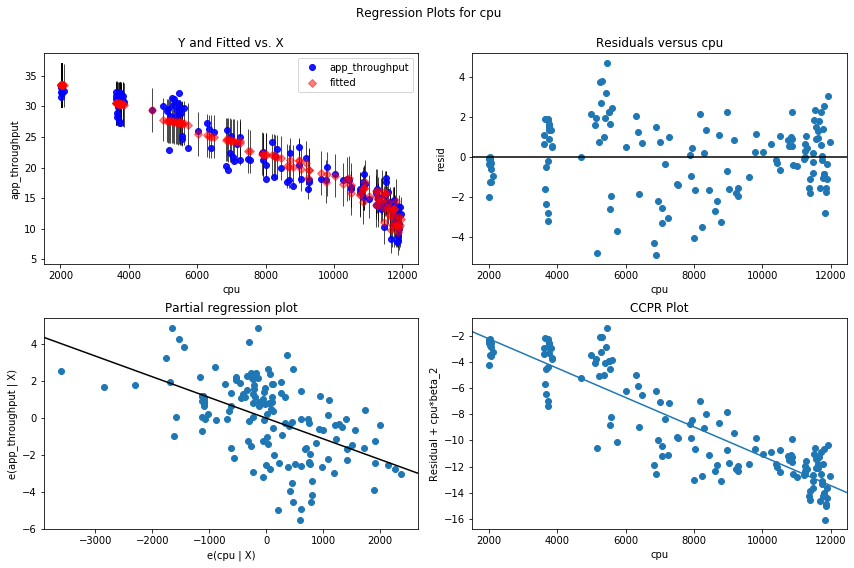

In [43]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

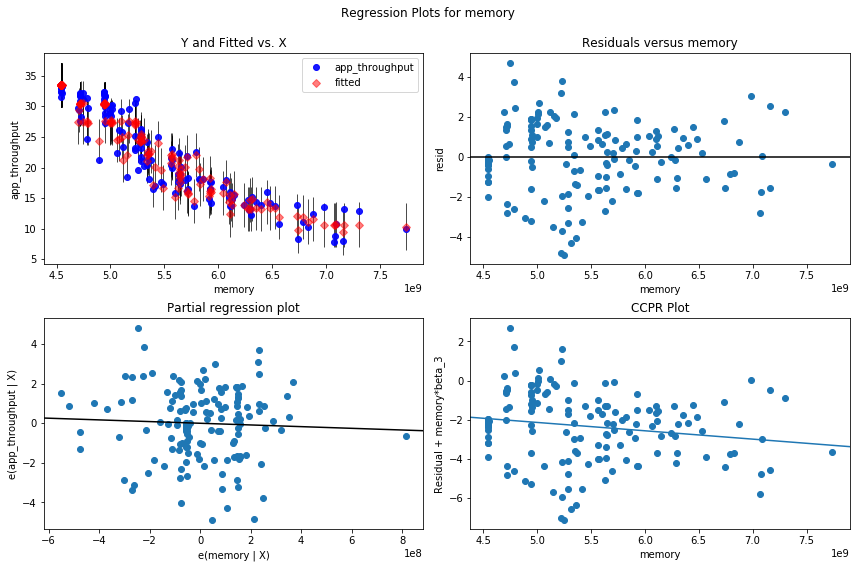

In [44]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "memory", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1406.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           5.21e-79
Time:                        02:56:06   Log-Likelihood:                -1309.8
No. Observations:                 155   AIC:                             2624.
Df Residuals:                     153   BIC:                             2630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2069.4302    172.148     12.021      

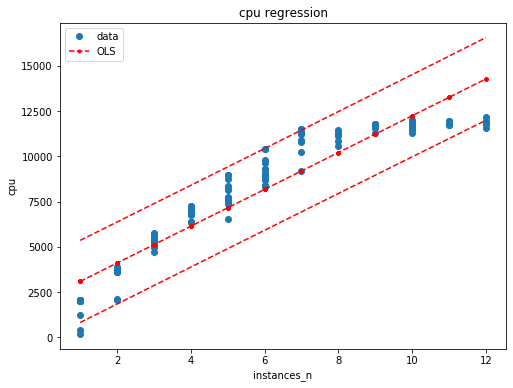

In [43]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

                            OLS Regression Results                            
Dep. Variable:                 memory   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     2003.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.72e-88
Time:                        19:14:06   Log-Likelihood:                -3094.2
No. Observations:                 151   AIC:                             6192.
Df Residuals:                     149   BIC:                             6198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.317e+09      3e+07    143.935      

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


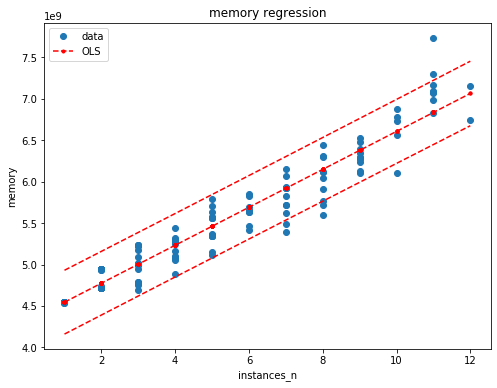

In [47]:
results = fit_regression(data=df, formula='memory ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='memory', variable='instances_n')

In [48]:
experiment_name = 'wrk_12x20'

exp_name, df = next(get_data_with_metrics(experiment_name, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1591802843,1591802848,15.24,8880.0,7167.0,4.690260e+09,1.0
1,1591802907,1591802908,10.08,20180.0,5906.0,4.676293e+09,1.0
2,1591802971,1591802969,20.20,5360.0,7869.0,4.687049e+09,1.0
3,1591803449,1591803453,21.11,5340.0,6597.0,4.683792e+09,1.0
4,1591803513,1591803514,10.05,20140.0,6163.0,4.669866e+09,1.0


                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2273.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.65e-60
Time:                        19:16:25   Log-Likelihood:                -264.11
No. Observations:                  82   AIC:                             532.2
Df Residuals:                      80   BIC:                             537.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.0505      1.468      9.574      

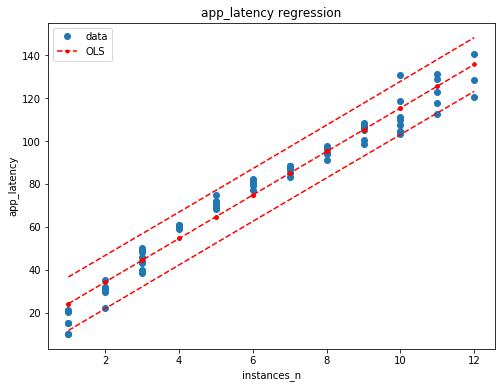

In [49]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.39e-23
Time:                        19:16:38   Log-Likelihood:                -351.11
No. Observations:                  82   AIC:                             706.2
Df Residuals:                      80   BIC:                             711.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -148.2236     15.911     -9.316      0.0

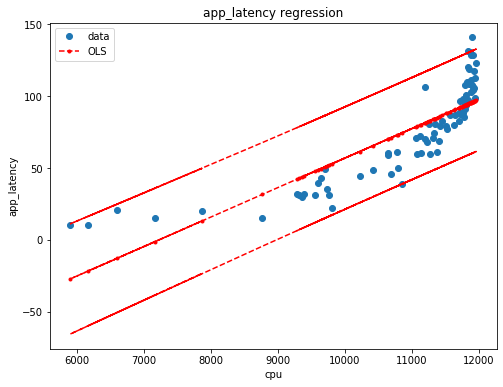

In [50]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           4.16e-19
Time:                        19:16:48   Log-Likelihood:                -361.61
No. Observations:                  82   AIC:                             727.2
Df Residuals:                      80   BIC:                             732.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -586.1194     56.387    -10.395      0.0

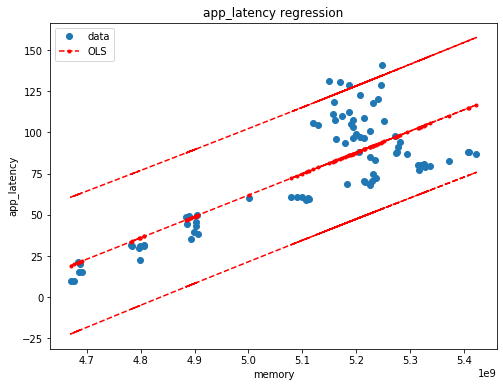

In [51]:
results = fit_regression(data=df, formula='app_latency ~ memory')
draw_regression_graph(results, df, metric_name='app_latency', variable='memory')
print(results.summary())

## Wrk 12x20min

In [52]:
experiment_name = 'wrk_12x20'

exp_name, df = next(get_data_with_metrics(experiment_name, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1591802843,1591802848,15.24,8880.0,7167.0,4.690260e+09,1.0
1,1591802907,1591802908,10.08,20180.0,5906.0,4.676293e+09,1.0
2,1591802971,1591802969,20.20,5360.0,7869.0,4.687049e+09,1.0
3,1591803449,1591803453,21.11,5340.0,6597.0,4.683792e+09,1.0
4,1591803513,1591803514,10.05,20140.0,6163.0,4.669866e+09,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2273.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.65e-60
Time:                        19:28:16   Log-Likelihood:                -264.11
No. Observations:                  82   AIC:                             532.2
Df Residuals:                      80   BIC:                             537.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.0505      1.468      9.574      

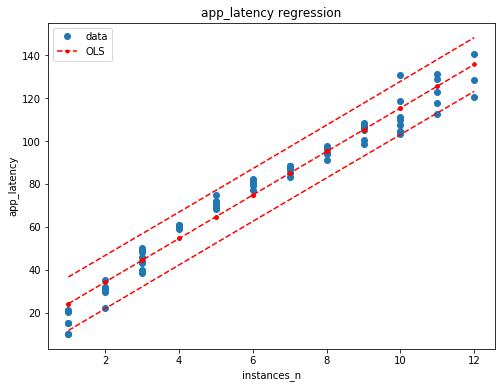

In [53]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.39e-23
Time:                        19:28:20   Log-Likelihood:                -351.11
No. Observations:                  82   AIC:                             706.2
Df Residuals:                      80   BIC:                             711.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -148.2236     15.911     -9.316      0.0

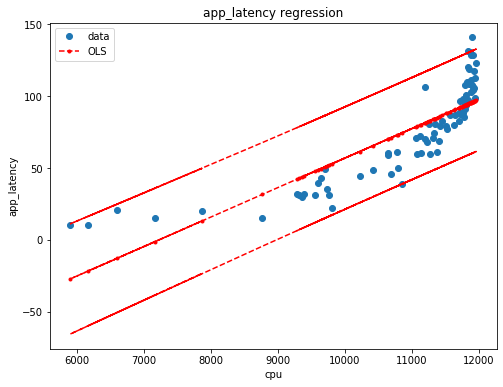

In [54]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `memory`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           4.16e-19
Time:                        19:28:24   Log-Likelihood:                -361.61
No. Observations:                  82   AIC:                             727.2
Df Residuals:                      80   BIC:                             732.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -586.1194     56.387    -10.395      0.0

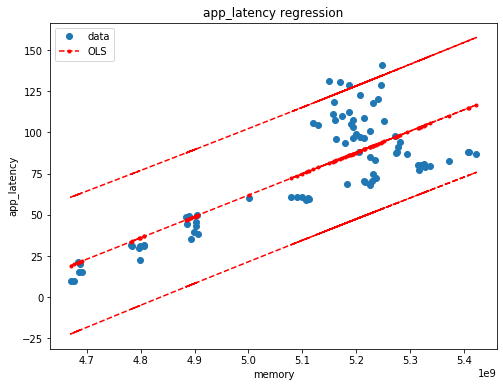

In [55]:
results = fit_regression(data=df, formula='app_latency ~ memory')
draw_regression_graph(results, df, metric_name='app_latency', variable='memory')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [56]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1787.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.71e-66
Time:                        19:28:29   Log-Likelihood:                -245.55
No. Observations:                  82   AIC:                             497.1
Df Residuals:                      79   BIC:                             504.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -25.1343      5.946     -4.227      

### `app_latency` ~ `instances_n` + `cpu` + `memory`

In [57]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1344.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           4.95e-67
Time:                        19:28:32   Log-Likelihood:                -240.18
No. Observations:                  82   AIC:                             488.4
Df Residuals:                      78   BIC:                             498.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -88.9481     20.109     -4.423      

### Single variable plots

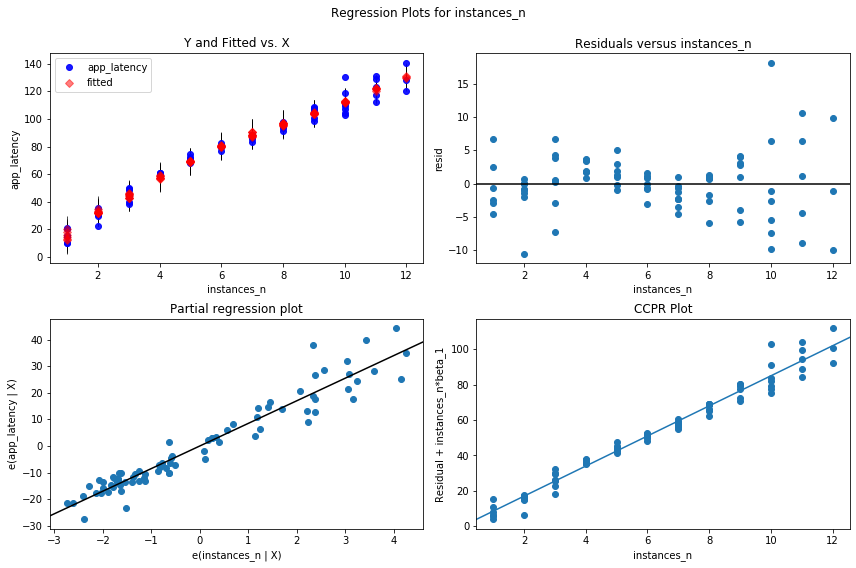

In [58]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

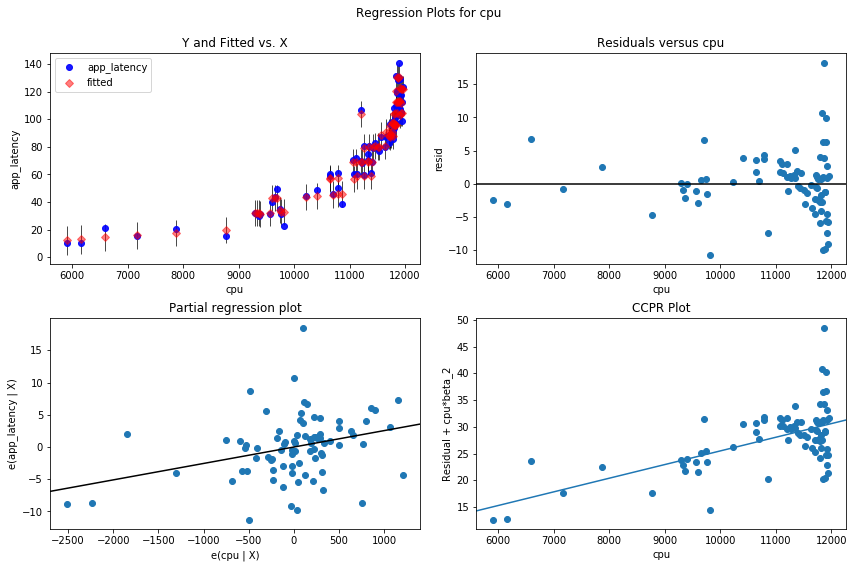

In [59]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

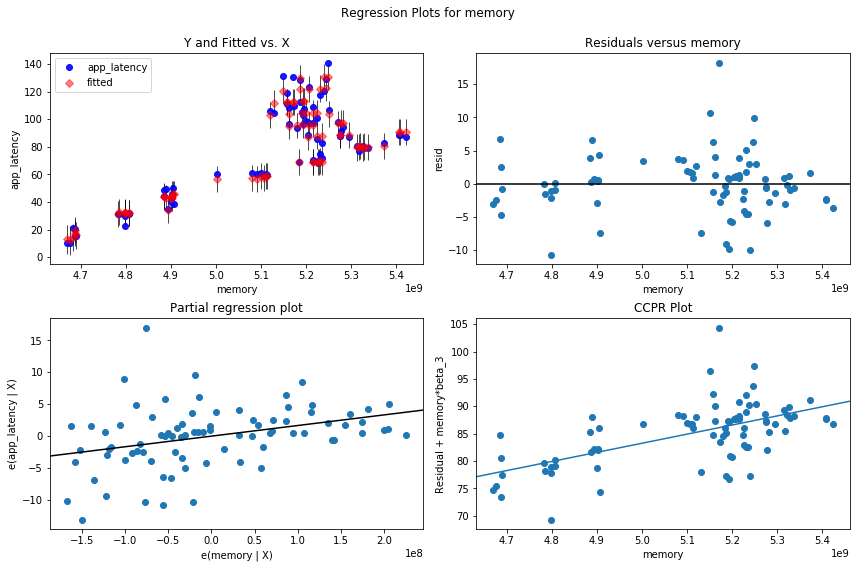

In [60]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "memory", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     134.5
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           8.14e-19
Time:                        19:28:46   Log-Likelihood:                -667.34
No. Observations:                  82   AIC:                             1339.
Df Residuals:                      80   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8875.9065    200.554     44.257      

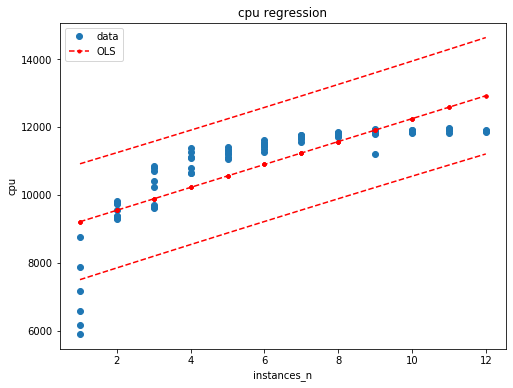

In [61]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

### `memory` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                 memory   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     91.92
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           6.18e-15
Time:                        19:28:53   Log-Likelihood:                -1653.1
No. Observations:                  82   AIC:                             3310.
Df Residuals:                      80   BIC:                             3315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.826e+09   3.33e+07    144.777      

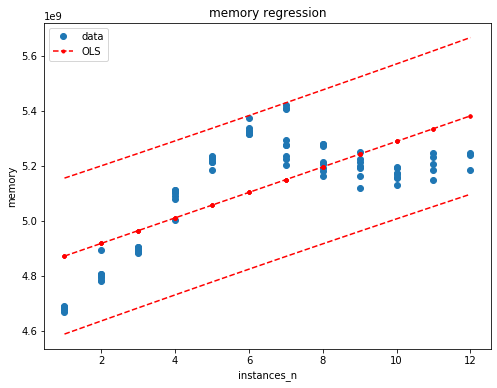

In [62]:
results = fit_regression(data=df, formula='memory ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='memory', variable='instances_n')

### `memory` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:                 memory   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     226.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           4.61e-25
Time:                        19:29:00   Log-Likelihood:                -1629.3
No. Observations:                  82   AIC:                             3263.
Df Residuals:                      80   BIC:                             3267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.71e+09   9.36e+07     39.620      0.0

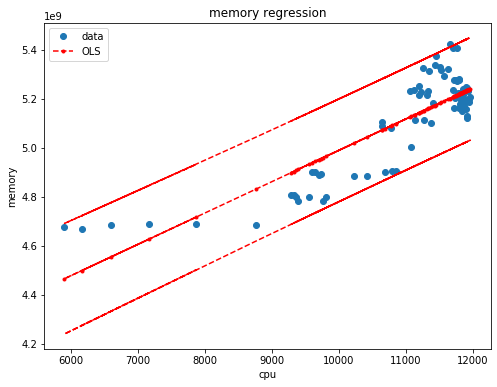

In [63]:
results = fit_regression(data=df, formula='memory ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='memory', variable='cpu')